In [107]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy import random as rng
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.signal import savgol_filter

In [2]:
def population(N, M, value=1):
    lattice = (value, (N,M))
    return np.full((N, M), value)

In [3]:
def plotpop(population, title=None, left=0, right=0, bottom=0, top=0): #add value to axes
    fig, ax = plt.subplots()
    
    cmap = plt.cm.viridis
    norm = plt.Normalize(-1, 2)
    
    plt.imshow(population, cmap=cmap, norm=norm, aspect = 'equal')
    plt.title(title)

A normal population is going to be 1s, immunized will be 0s, infected will be -1s

In [4]:
def randomperson(population):
    #make one variable x the width of the lattice: x = np.shape(lattice)[0]
    #make one variable y the height of the lattice: y = np.shape(lattice)[1]
    #rn_x is a random integer from 0 to x: rn_x = rng.randint(0,x)
    #rn_y is a random integer from 0 to y: rn_y = rng.randint(0,y)
    #define (rn_x, rn_y) in lattice: particle = lattice[rn_x, rn_y]
    x = np.shape(population)[0]
    y = np.shape(population)[1]
    rn_x = rng.randint(0,x)
    rn_y = rng.randint(0,y)
    person = rn_x, rn_y
    return person

In [5]:
def immunize(population, person):
    new_val = 0
    p_x = person[0]
    p_y = person[1]
    if population[p_x][p_y] == 2:
        return population
    else:
        population[p_x][p_y] = new_val
        return population

In [6]:
def percimmune(perc, population):
    N = np.shape(population)[0]
    M = np.shape(population)[1]
    popdim = N * M
    numimmune = int(perc * popdim)
    i = 0
    while i < numimmune:
        r = randomperson(population)
        r_x = r[0]
        r_y = r[1]
        while population[r_x][r_y] == 0:
            r = randomperson(population)
            r_x = r[0]
            r_y = r[1]
        while population[r_x][r_y] == 2:
            r = randomperson(population)
            r_x = r[0]
            r_y = r[1]
        population = immunize(population, r)
        i += 1
    return population

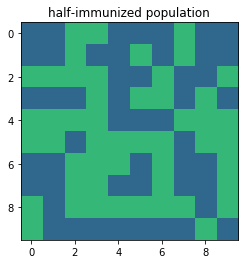

In [7]:
p = population(10,10)
newp = percimmune(.5, p)
plotpop(newp, 'half-immunized population')

In [8]:
def copypopulation(population):
    lattice = population
    return lattice

In [9]:
def infect(population, person):
    p_x = person[0]
    p_y = person[1]
    val = population[p_x][p_y]
    if val == 2:
        newpop = population
    else:
        new_val = ((val**2) * -1)    #if val is 0, this will return 0; if it is either 1 or -1, it will return -1
        newpop = copypopulation(population)
        newpop[p_x][p_y] = new_val
    return newpop

In [10]:
def sumpop(pop):
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]
    
    sumpop = 0
    
    j = 0
    while j < M:
        i = 0
        while i < N:
            x = pop[i][j]
            sumpop = sumpop + x
            i += 1
        j += 1

    return sumpop

In [11]:
def infectneighbors(pop):
    
    bound_x = np.shape(pop)[0] - 1
    bound_y = np.shape(pop)[1] - 1
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]

    newpop = copypopulation(pop)
    
    infectedcells = []
    
    j = 0
    while j < M:
        i = 0
        while i < N:
            if pop[i][j] == -1:
                infectedcells.append((i,j))    
            i += 1
        j += 1

    for (i,j) in infectedcells:
        if i == 0:
            person = (i+1, j)
            newpop = infect(newpop, person)
        elif i == bound_x:
            person = (i-1, j)
            newpop = infect(newpop, person)
        else: #i in between
            person1 = (i-1, j)
            newpop = infect(newpop, person1)
            person2 = i+1, j
            newpop = infect(newpop, person2)
        if j == 0:
            person = (i, j+1)
            newpop = infect(newpop, person)
        elif j == bound_y:
            person = (i, j-1)
            newpop = infect(newpop, person)
        else: #j in between
            person1 = (i, j-1)
            newpop = infect(newpop, person1)
            person2 = (i, j+1)
            newpop = infect(newpop, person2)

    return newpop

In [12]:
def infectradius(pop, radius):
    r = radius + 1
    
    bound_x = np.shape(pop)[0] - 1
    bound_y = np.shape(pop)[1] - 1
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]

    newpop = copypopulation(pop)
    
    infectedcells = []
    j = 0
    while j < M:
        i = 0
        while i < N:
            if pop[i][j] == -1:
                infectedcells.append((i,j))    
            i += 1
        j += 1

    for (i,j) in infectedcells:
        if i == 0:
            if j == 0:
                for k in range(r):
                    for l in range(r):
                        person = (i+k, j+l)
                        newpop = infect(newpop, person)
            elif j == bound_y:
                for k in range(r):
                    for l in range(r):
                        person = (i+k, j-l)
                        newpop = infect(newpop, person)
            else: #j in between
                for k in range(r):
                    for l in range(min(r, bound_y-j)):
                        person1 = (i+k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i+k, j+l)
                        newpop = infect(newpop, person2)
        elif i == bound_x:
            if j == 0:
                for k in range(r):
                    for l in range(r):
                        person = (i-k, j+l)
                        newpop = infect(newpop, person)
            elif j == bound_y:
                for k in range(r):
                    for l in range(r):
                        person = (i-k, j-l)
                        newpop = infect(newpop, person)
            else: #j in between
                for k in range(r):
                    for l in range(min(r, bound_y-j)):
                        person1 = (i-k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i-k, j+l)
                        newpop = infect(newpop, person2)
        else: #i in between
            if j == 0:
                for k in range(min(r, bound_x-i)):
                    for l in range(r):
                        person1 = (i-k, j+l)
                        newpop = infect(newpop, person1)
                        person2 = (i+k, j+l)
                        newpop = infect(newpop, person2)
            elif j == bound_y:
                for k in range(min(r, bound_x-i)):
                    for l in range(r):
                        person1 = (i-k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i+k, j-l)
                        newpop = infect(newpop, person2)
            else: #j in between
                for k in range(min(r, bound_x-i)):
                    for l in range(min(r, bound_y-j)):
                        person1 = (i-k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i-k, j+l)
                        newpop = infect(newpop, person2)
                        person3 = (i+k, j-l)
                        newpop = infect(newpop, person3)
                        person4 = (i+k, j+l)
                        newpop = infect(newpop, person4)

    return newpop

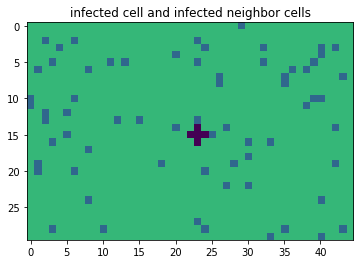

In [13]:
p = population(30,45)
percimmune(.05, p)
newp = infect(p, (15, 23))
infectneighbors(newp)
plotpop(newp, "infected cell and infected neighbor cells")

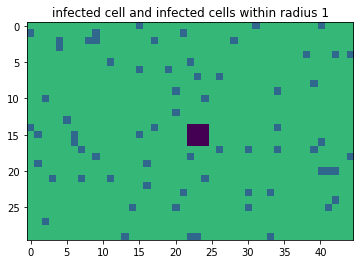

In [14]:
p = population(30,45)
percimmune(.05, p)
newp = infect(p, (15, 23))
infectradius(newp, 1)
plotpop(newp, 'infected cell and infected cells within radius 1')

In [15]:
def runinfectn(pop, iterations):
    i = 0
    while i < iterations:
        infectneighbors(pop)
        i += 1
    plotpop(pop, 'infection run over %d iterations' %(iterations))

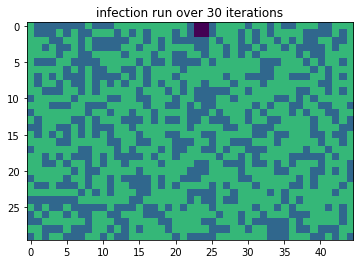

In [16]:
p = population(30,45)
percimmune(.4, p)
newp = infect(p, (0, 23))
runinfectn(newp, 30)

In [17]:
def runinfectr(pop, radius, iterations):
    i = 0
    while i < iterations:
        infectradius(pop, radius)
        i += 1
    plotpop(pop, 'infection with radius %s run over %d iterations' %(radius, iterations))

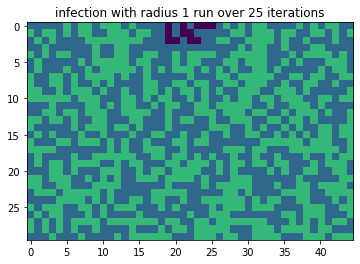

In [18]:
p = population(30,45)
percimmune(.5, p)
newp = infect(p, (0, 23))
runinfectr(newp, 1, 25)

In [19]:
def ifduplicates(array):

    originalarray = []
    
    for x in array:
        originalarray.append(x)
    
    newarray = []
    for x in array:
        if x not in newarray:
            newarray.append(x)
    for y in newarray:
        array.remove(y)

    #array is now just the duplicates
        
    if len(array) == 0:
        return originalarray, 0, array
    else:
        return originalarray, len(array), array

In [20]:
def nfinditeration(pop, perc):
    
    popcopy = pop.copy()
    
    its = 0
    uninfected = []
    lenuninfected = []
    
    pop = percimmune(perc, pop)
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]
    
    dimpop = N * M
    
    loop = 0
    while loop < 1:
        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == 1:
                    uninfected.append((i,j))
                elif pop[i][j] == 0:
                    uninfected.append((i,j))
                elif pop[i][j] == 2:
                    uninfected.append((i,j))
                i += 1
            j += 1
        
        num = len(uninfected)
        lenuninfected.append(num) 
        
        (lenuninfected, num, unnecessaryarray) = ifduplicates(lenuninfected)
        
        if len(uninfected) == dimpop:
            infect(pop, randomperson(pop))
            lenuninfected.clear()
        else:
            if num > 0:
                loop = 1
            elif len(uninfected) > 0:
                pop = infectneighbors(pop)
                uninfected.clear()
            else:
                loop = 1
        its += 1
    return its, popcopy

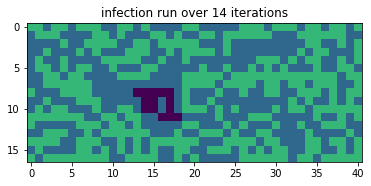

In [21]:
p = population(17,41)
infect(p, (8, 20))
i = nfinditeration(p, .5)[0]
runinfectn(p, i)

In [22]:
def rfinditeration(pop, perc, r):
    
    popcopy = pop.copy()
    
    its = 0
    uninfected = []
    lenuninfected = []
    
    percimmune(perc, pop)
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]
    
    dimpop = N * M
    
    loop = 0
    while loop < 1:
        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == 1:
                    uninfected.append((i,j))
                elif pop[i][j] == 0:
                    uninfected.append((i,j))
                elif pop[i][j] == 2:
                    uninfected.append((i,j))
                i += 1
            j += 1
        
        num = len(uninfected)
        lenuninfected.append(num) 
        
        (lenuninfected, num, unnecessaryarray) = ifduplicates(lenuninfected)
        
        if len(uninfected) == dimpop:
            infect(pop, randomperson(pop))
            lenuninfected.clear()
        else:
            if num > 0:
                loop = 1
            elif len(uninfected) > 0:
                pop = infectradius(pop,r)
                uninfected.clear()
            else:
                loop = 1
        its += 1
    return its, popcopy

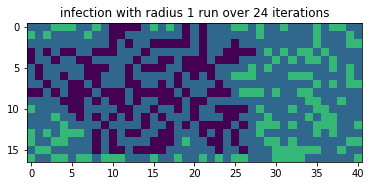

In [23]:
p = population(17,41)
infect(p, (8, 20))
i = rfinditeration(p, 0.6, 1)[0]
runinfectr(p, 1, i)

In [112]:
def nimmuneeffect(pop):
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]
    
    dimpop = N * M
    
    p_im = []
    p_inf = []
    
    percent = 0


    (its, popcopy) = nfinditeration(pop, percent)
    
    plotpop(popcopy)
    
    while percent < 1:
        pop = popcopy.copy()
        nfinditeration(pop, percent)
        numinfected = 0
        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == -1:
                    numinfected += 1
                elif pop[i][j] == 2:
                    numinfected += 1
                i += 1
            j += 1
        inffrac = float(numinfected/dimpop)
        p_inf.append(inffrac)
        p_im.append(percent)
        percent += .01
    
    if percent == 1:
        p_im.append(1)
        p_inf.append(0)

    p_inf_reg = savgol_filter(p_inf, 51, 3)
    
    plt.clf()
    plt.plot(p_im, p_inf, linestyle='none', marker = '+', color='c')
    plt.plot(p_im, p_inf_reg, color = 'k')
    plt.title('percent immunized vs. percent infected')
    plt.grid(True)
    plt.show()

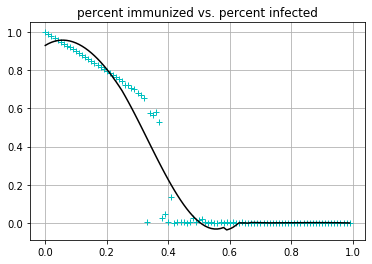

In [113]:
p = population(100,100)
infect(p, (5, 5))
nimmuneeffect(p)

In [114]:
def rimmuneeffect(pop, r):
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]
    
    dimpop = N * M
    
    p_im = []
    p_inf = []
    
    percent = 0


    (its, popcopy) = rfinditeration(pop, percent, r)
    
    plotpop(popcopy)
    
    while percent < 1:
        pop = popcopy.copy()
        rfinditeration(pop, percent, r)
        numinfected = 0
        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == -1:
                    numinfected += 1
                elif pop[i][j] == 2:
                    numinfected += 1
                i += 1
            j += 1
        inffrac = float(numinfected/dimpop)
        p_inf.append(inffrac)
        p_im.append(percent)
        percent += .01
    
    if percent == 1:
        p_im.append(1)
        p_inf.append(0)
    
    p_inf_reg = savgol_filter(p_inf, 3, 1)
    
    plt.clf()
    plt.plot(p_im, p_inf, linestyle='none', marker = '+', color='c')
    plt.plot(p_im, p_inf_reg, color = 'k')
    plt.title('percent immunized vs. percent infected')
    plt.grid(True)
    plt.show()

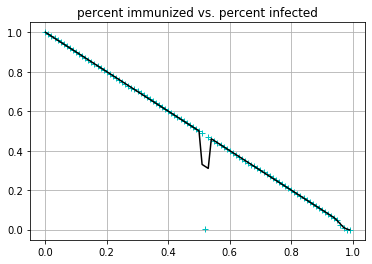

In [115]:
p = population(100,100)
infect(p, (5, 5))
rimmuneeffect(p, 5)

In [28]:
def runduplicates(array, n):
    arraycopy = array.copy()
    layers = 0
    while layers < n:
        newarray, ln, array = ifduplicates(array)
        layers += 1
    return arraycopy, array
#array is now a list of the cells that repeat at least N times, but there may still be repeats in it

In [29]:
def ninfectrec(pop, iterations, n, immune, fatality):
    its = 0
    
    infectedcells = []
    
    repeatinfectedcells_outsideloop = []
    
    while its < iterations:
        N = np.shape(pop)[0]
        M = np.shape(pop)[1]

        #infectedcells = []

        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == -1:
                    infectedcells.append((i,j))    
                i += 1
            j += 1
        
        infectneighbors(pop)
        its += 1
        
        infectedcells, changecells = runduplicates(infectedcells, n)

        newpop = pop.copy()
        
        for x in changecells:
            p_x = x[0]
            p_y = x[1]
            val = pop[p_x][p_y]
            if val == 2:
                newpop = pop
                
            det = rng.random()
            if det < fatality:                 #probability that someone dies
                new_val = 2
                newpop[p_x][p_y] = new_val
            elif immune == True:                   #if having the disease immunizes you against it in the future
                new_val = 0
                newpop[p_x][p_y] = new_val
            else:                              #ininfects a person but they're susceptible to it again
                new_val = ((val**2))    #if val is 0, this will return 0; if it is either 1 or -1, it will return 1
                newpop[p_x][p_y] = new_val

    
    plotpop(newpop, 'infection run through %d iterations with recovery after %r iterations and fatality rate %s' %(iterations, n, fatality))

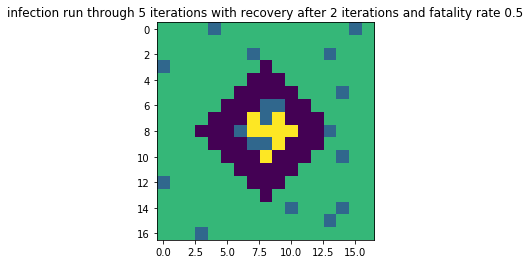

In [30]:
p = population(17,17)
percimmune(.05, p)
infect(p, (8, 8))
ninfectrec(p, 5, 2, True, .5)

In [31]:
def rinfectrec(pop, radius, iterations, n, immune, fatality):
    its = 0
    
    infectedcells = []
    
    repeatinfectedcells_outsideloop = []
    
    while its < iterations:
        N = np.shape(pop)[0]
        M = np.shape(pop)[1]

        #infectedcells = []

        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == -1:
                    infectedcells.append((i,j))    
                i += 1
            j += 1
        
        infectradius(pop, radius)
        its += 1
        
        infectedcells, changecells = runduplicates(infectedcells, n)

        newpop = pop.copy()
        
        for x in changecells:
            p_x = x[0]
            p_y = x[1]
            val = pop[p_x][p_y]
            if val == 2:
                newpop = pop
                
            det = rng.random()
            if det < fatality:                 #probability that someone dies
                new_val = 2
                newpop[p_x][p_y] = new_val
            elif immune == True:                   #if having the disease immunizes you against it in the future
                new_val = 0
                newpop[p_x][p_y] = new_val
            else:                              #ininfects a person but they're susceptible to it again
                new_val = ((val**2))    #if val is 0, this will return 0; if it is either 1 or -1, it will return 1
                newpop[p_x][p_y] = new_val

    
    plotpop(newpop, 'infection of radius %a run through %d iterations with recovery after %r iterations and fatality rate %s' %(radius, iterations, n, fatality))

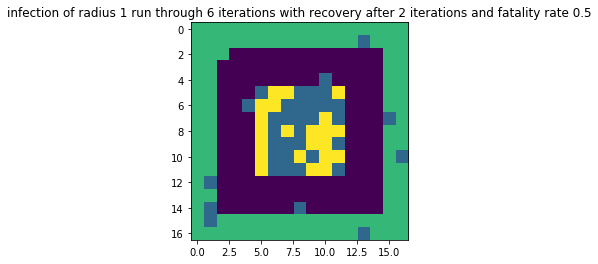

In [32]:
p = population(17,17)
percimmune(.05, p)
infect(p, (8, 8))
rinfectrec(p, 1, 6, 2, True, .5)

In [33]:
def infectrec(pop, radius, iterations, n, immune, fatality):   #if this function doesn't start with a population
    its = 0                                                    #with at least one infected cell it won't do
                                                               #anything
    infectedcells = []
    
    repeatinfectedcells_outsideloop = []
    
    while its < iterations:
        N = np.shape(pop)[0]
        M = np.shape(pop)[1]

        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == -1:
                    infectedcells.append((i,j))    
                i += 1
            j += 1

        if radius == 0:
            pop = infectneighbors(pop)
        else:
            pop = infectradius(pop, radius)

        infectedcells, changecells = runduplicates(infectedcells, n)

        newpop = pop.copy()

        for x in changecells:
            ccrepeats = []
            if x not in ccrepeats:
                ccrepeats.append(x)                
                p_x = x[0]
                p_y = x[1]
                val = pop[p_x][p_y]
                if val == 2:
                    newpop = newpop
                else:
                    det = rng.random()
                    if det < fatality:                 #probability that someone dies
                        new_val = 2
                        newpop[p_x][p_y] = new_val
                    elif immune == True:        #if having the disease immunizes you against it in the future
                        new_val = 0
                        newpop[p_x][p_y] = new_val
                    else:                       #uninfects a person (but they're susceptible to it again)
                        new_val = ((val**2))    #if val is 0, this will return 0; if it is either 1 or -1, it will return 1
                        newpop[p_x][p_y] = new_val
        its += 1

    return(infectedcells, newpop)

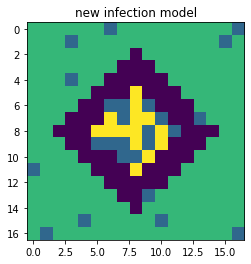

In [34]:
p = population(17,17)
percimmune(.05, p)
infect(p, (8, 8))
x = infectrec(p, 0, 6, 2, True, .5)[1]
plotpop(x, 'new infection model')

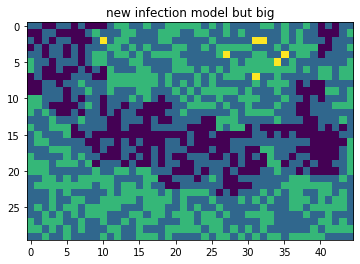

In [39]:
p = population(30,45)
percimmune(.5, p)
newp = infect(p, (0, 23))
x = infectrec(newp, 1, 25, 8, False, .05)[1]
plotpop(x, 'new infection model but big')

In [102]:
def recfinditeration(pop, perc, r, n, immune, fatality):
    
    pops = []
    pop_its = []
    
    popcopy = pop.copy()
    
    its = 0
    uninfected = []
    lenuninfected = []
    
    pop = percimmune(perc, pop)
    
    immunecopy = pop.copy()
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]
    
    dimpop = N * M
    
    previnfect = []
    
    loop = True
    while loop == True:
        its += 1
        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == 1:
                    uninfected.append((i,j))             
                elif pop[i][j] == 0:
                    uninfected.append((i,j))
                elif pop[i][j] == 2:
                    uninfected.append((i,j))
                i += 1
            j += 1
        
        a = len(uninfected)
        lenuninfected.append(a) 

        #not changing lenuninfected, getting number of values in lenuninfected that repeat
        #aka the number of times the population has had the same number of uninfected people
        
        (lenuninfected, num, lenuninfectedduplicates) = ifduplicates(lenuninfected)
        
        for x in lenuninfectedduplicates:
            chork = []
            if x not in chork:
                chork.append(x)
            num = len(chork)                #if cells repeat in the uninfected numbers i just want them once
        
        if num>0:
            plotpop(pop, '%s. final (reached stable state)' %(its))
            pops.append(pop)
            pop_its.append(its)
            loop = False
        else:
            if len(uninfected) == dimpop:             #if the uninf count that resets each time includes everyone
                plotpop(pop, '%s. everyone is healthy or dead' %(its))
                pops.append(pop)
                pop_its.append(its)
                people = []                           #this should indicate that everyone is uninfected
                loop2 = True                          #ooo then this should include formerly infected ppl hmmm
                while loop2 == True:
                    sumpop_1 = sumpop(pop)
                    person = randomperson(pop)
                    if person not in people:
                        people.append(person)
                        infect(pop, randomperson(pop))
                        #plotpop(pop)
                        sumpop_2 = sumpop(pop)
                        diff = sumpop_1 - sumpop_2
                        if diff == 0:
                            loop2 = True
                        else:
                            plotpop(pop, '%r. infected a random person. uninfected num = %s' %(its, len(uninfected)))
                            pops.append(pop)
                            pop_its.append(its)
                            loop2 = False
                    elif person in people:
                        if len(people) == dimpop:            #if you've checked everyone and they can't be infected
                            plotpop(pop, '%s. final (infection gone)' %(its))
                            pops.append(pop)
                            pop_its.append(its)
                            loop = False  #end function
                        else:
                            loop2 = True
            else:
                if len(uninfected) > 0:
                    plotpop(pop, '%r. uninfected num = %s. running recovery-model infection again.' %(its, len(uninfected)))
                    pops.append(pop)
                    pop_its.append(its)
                    infectedcells, pop = infectrec(pop,r,its,n,immune,fatality) #this isn't infecting anyone?
                    uninfected.clear()  #returns to indexing plot values; uninfected clear but lenuninfected not
                    #print("looping again. new number of infected cells = ", len(infectedcells),"\n clear uninfected len=", len(uninfected),"\niterations run =", its, "\npop =\n", pop)      
                else:
                    plotpop(pop, '%s. final (everyone is infected)' %(its))
                    pops.append(pop)
                    pop_its.append(its)
                    loop = False
    return its, immunecopy, pop, pops

iterations = 13


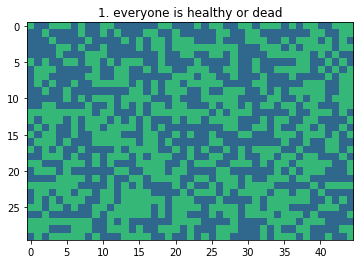

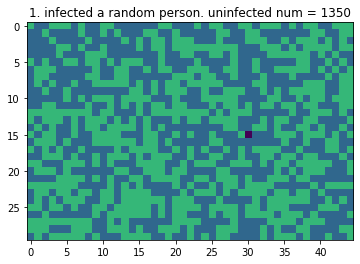

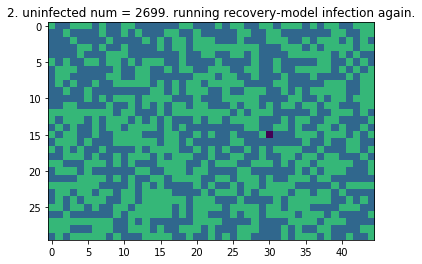

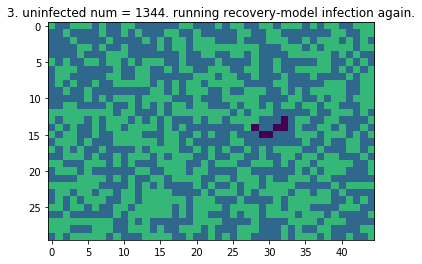

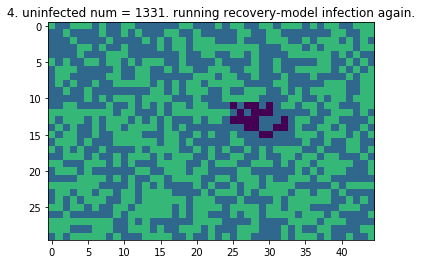

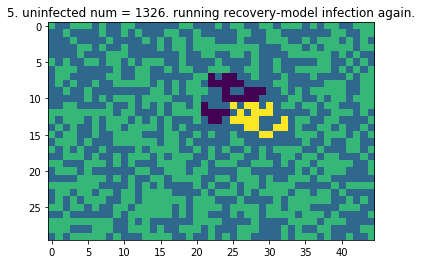

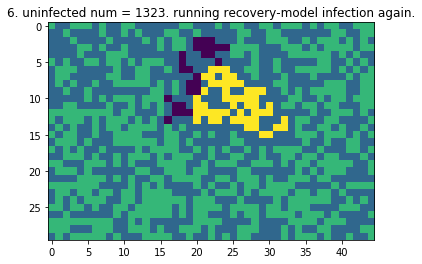

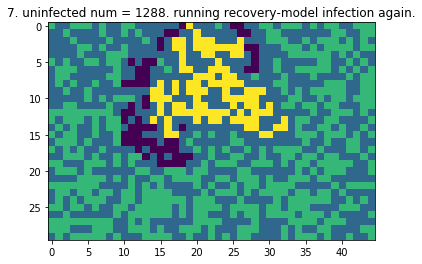

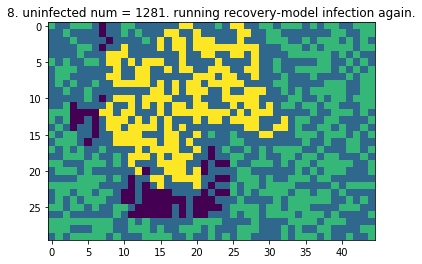

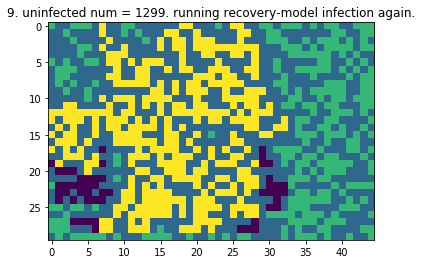

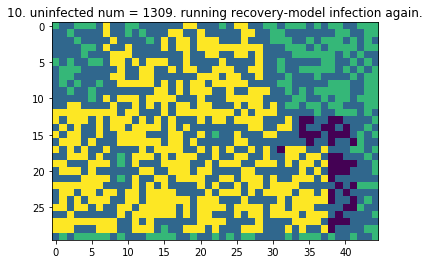

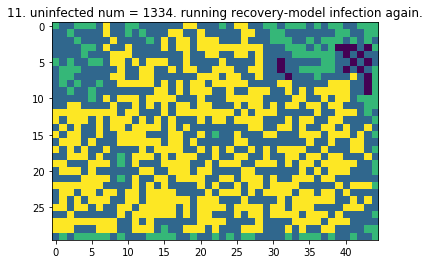

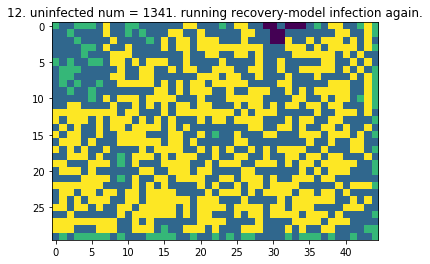

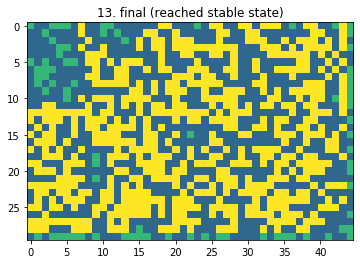

In [104]:
p = population(30,45)

perc = .5
r = 1
n = 3
immune = False
fatality = 1

its, p, newp, idk = recfinditeration(p, perc, r, n, immune, fatality)
print("iterations =", its)